<a href="https://colab.research.google.com/github/pra1ab/myfiles/blob/main/Worksheet4_2358463_PralabRajMahat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.
3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
df = pd.read_csv('/content/drive/MyDrive/DATASET/diabetes - Copy.csv')
print ("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Dataset info
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0000

In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Step2: Handle Missing Data

In [7]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)
print("Updated DataFrame:")
print(df.head())

Updated DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Step 3: Separate Feature Matrix and Target Variable.
Step 4: Implementing KNN from Scratch

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

df = pd.read_csv('/content/drive/MyDrive/DATASET/diabetes - Copy.csv')
print(df.head)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

def train_test_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(indices) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

# Call train_test_split and assign returned values to variables
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("Sample Training Features (First 5 Rows):")
print(X_train.head())

print("\nSample Training Target Variable (First 5 Rows):")
print(y_train.head())

print("\nSample Test Features (First 5 Rows):")
print(X_test.head())

print("\nSample Test Target Variable (First 5 Rows):")
print(y_test.head())

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [19]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def predict_single(X_train, y_train, query_point, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train.iloc[i], query_point)
        distances.append((dist, y_train.iloc[i]))
    distances = sorted(distances, key=lambda x: x[0])[:k]
    labels = [label for _, label in distances]
    return max(set(labels), key=labels.count)

def predict_knn(X_train, y_train, X_test, k):
    predictions = []
    for i in range(len(X_test)):
        pred = predict_single(X_train, y_train, X_test.iloc[i], k)
        predictions.append(pred)
    return np.array(predictions)

def evaluate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

k = 5
y_pred = predict_knn(X_train, y_train, X_test, k)
accuracy = evaluate_accuracy(y_test.values, y_pred)
print(f"Accuracy for k={k}: {accuracy * 100:.2f}%")


Accuracy for k=5: 68.70%


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Accuracy with Original Data: 68.83%
Accuracy with Scaled Data: 70.13%


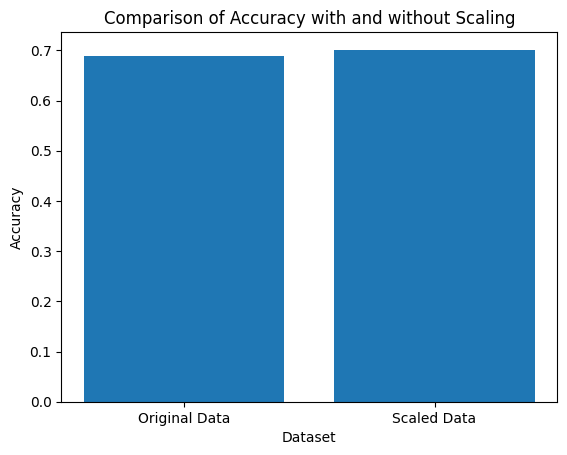

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/DATASET/diabetes - Copy.csv')

print(df.isnull().sum())
df = df.dropna()

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy with Original Data: {accuracy_original * 100:.2f}%")
print(f"Accuracy with Scaled Data: {accuracy_scaled * 100:.2f}%")

labels = ['Original Data', 'Scaled Data']
accuracies = [accuracy_original, accuracy_scaled]
plt.bar(labels, accuracies)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy with and without Scaling')
plt.show()



When we scale the features using StandardScaler, we make sure all the features have a mean of 0 and a standard deviation of 1. This is important for algorithms like kNN, which use the distance between points to make predictions. If one feature has very large values compared to others, it could make that feature more important when calculating the distance, which might lead to wrong predictions. Scaling helps to make sure every feature has the same impact on the distance.

For the diabetes dataset, if the model works better after scaling, it means the original data had features that were not on the same scale. But if scaling makes the performance worse, it could mean that the way the data was originally distributed was better for the model.










Problem 3 : Experementation with K
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

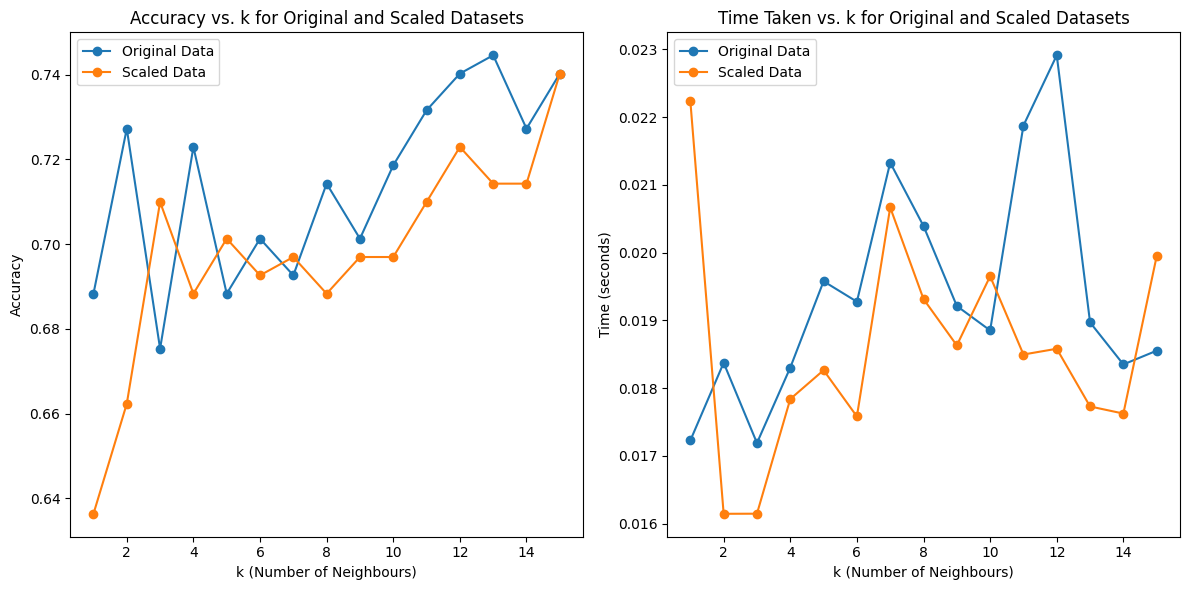

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/DATASET/diabetes - Copy.csv')

df = df.dropna() #checking missing values and data cleaning if necessary

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values =(range(1, 16))
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    start_time = time.time()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_original.append(accuracy_score(y_test, y_pred))
    time_original.append(time.time() - start_time)

    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    y_pred_scaled = knn.predict(X_test_scaled)
    accuracy_scaled.append(accuracy_score(y_test, y_pred_scaled))
    time_scaled.append(time.time() - start_time)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, marker='o', label='Original Data')
plt.plot(k_values, accuracy_scaled, marker='o', label='Scaled Data')
plt.xlabel('k (Number of Neighbours)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for Original and Scaled Datasets')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, marker='o', label='Original Data')
plt.plot(k_values, time_scaled, marker='o', label='Scaled Data')
plt.xlabel('k (Number of Neighbours)')
plt.ylabel('Time (seconds)')
plt.title('Time Taken vs. k for Original and Scaled Datasets')
plt.legend()

plt.tight_layout()
plt.show()



When you change the number of neighbors \( k \), the accuracy of the model can go up at first, but if \( k \) gets too big, the model might start to make mistakes and not fit the data well (this is called underfitting). On the other hand, if \( k \) is too small (like 1), the model might memorize the training data too much and not work well on new data (this is called overfitting).

As you make \( k \) bigger, it will take more time to make predictions because the model needs to do more work to check more neighbors.

The best value of \( k \) is the one that gives the highest accuracy without taking too much time. That's the value you want to choose for the model.

Problem - 4 - Additional Questions {Optional - But Highly Recommended}:
• Discuss the challenges of using KNN for large datasets and high-dimensional data.
• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

KNN can be slow and difficult to use with large datasets because it needs to calculate the distance between the test point and every training point. If there are thousands or millions of data points, this process takes a lot of time and resources. In high-dimensional data, the problem gets worse because the number of features (or dimensions) increases, making it harder to measure distance correctly. This is called the "curse of dimensionality." With more dimensions, data points can become far apart, and the distance calculation becomes less useful, which can make KNN less accurate.

Strategies to Improve KNN Efficiency
Approximate Nearest Neighbors (ANN):

Instead of calculating the exact distance for every single data point, approximate methods try to find the nearest neighbors faster. These methods can give you a good enough result much quicker, saving time when dealing with large datasets.
Dimensionality Reduction:

Sometimes, not all features are necessary for making predictions. You can reduce the number of features (dimensions) using methods like PCA (Principal Component Analysis). By doing this, you make the data easier to process, which speeds up the KNN algorithm without losing too much important information.
KD-Tree or Ball-Tree:

These are special data structures used to organize data points in a way that makes distance calculations faster. Using these methods, KNN can search for neighbors more efficiently, especially when the dataset is large.
By using these strategies, we can make KNN faster and more accurate, even with large datasets and many features.






